<a href="https://colab.research.google.com/github/HasithaGallella/EN3150-Pattern-Recognition/blob/main/9_Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


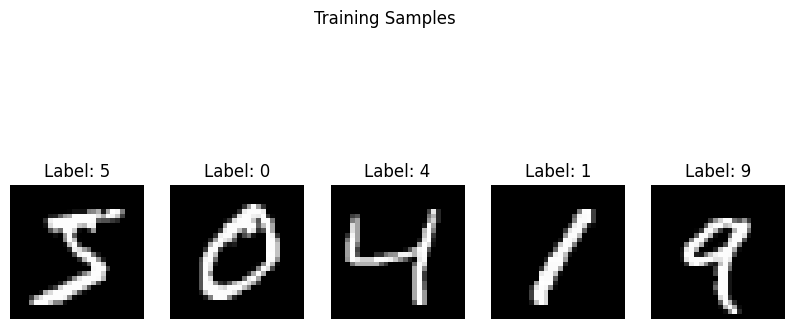

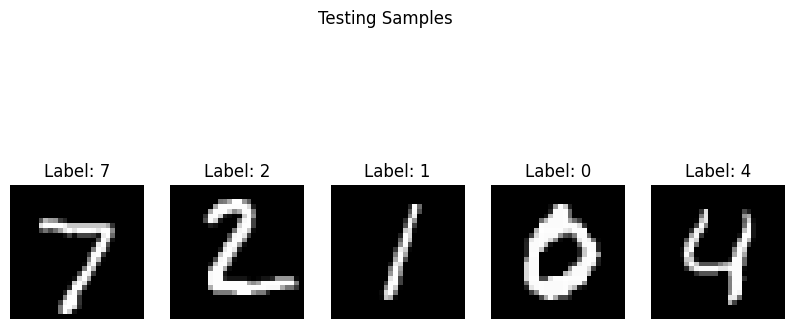

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to plot samples with labels
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')

# Define class names for MNIST (digits 0-9)
class_names = [str(i) for i in range(10)]

# Plot a few training samples
plot_samples(train_images, train_labels, class_names, num_samples=5)
plt.suptitle('Training Samples')
plt.show()

# Plot a few testing samples
plot_samples(test_images, test_labels, class_names, num_samples=5)
plt.suptitle('Testing Samples')
plt.show()


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Custom initializer for constant value

# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),
     # Add a dense (fully connected) layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.5, batch_size=1024,verbose=2)



Epoch 1/15
30/30 - 3s - 115ms/step - accuracy: 0.5377 - loss: 1.7065 - val_accuracy: 0.7722 - val_loss: 1.0240
Epoch 2/15
30/30 - 1s - 22ms/step - accuracy: 0.8451 - loss: 0.6606 - val_accuracy: 0.8800 - val_loss: 0.4519
Epoch 3/15
30/30 - 1s - 22ms/step - accuracy: 0.8971 - loss: 0.3829 - val_accuracy: 0.9054 - val_loss: 0.3400
Epoch 4/15
30/30 - 1s - 21ms/step - accuracy: 0.9149 - loss: 0.3073 - val_accuracy: 0.9179 - val_loss: 0.2933
Epoch 5/15
30/30 - 1s - 42ms/step - accuracy: 0.9263 - loss: 0.2643 - val_accuracy: 0.9264 - val_loss: 0.2613
Epoch 6/15
30/30 - 1s - 22ms/step - accuracy: 0.9355 - loss: 0.2341 - val_accuracy: 0.9323 - val_loss: 0.2400
Epoch 7/15
30/30 - 1s - 41ms/step - accuracy: 0.9412 - loss: 0.2117 - val_accuracy: 0.9365 - val_loss: 0.2229
Epoch 8/15
30/30 - 1s - 21ms/step - accuracy: 0.9458 - loss: 0.1937 - val_accuracy: 0.9399 - val_loss: 0.2102
Epoch 9/15
30/30 - 1s - 41ms/step - accuracy: 0.9500 - loss: 0.1781 - val_accuracy: 0.9441 - val_loss: 0.1976
Epoch 10/

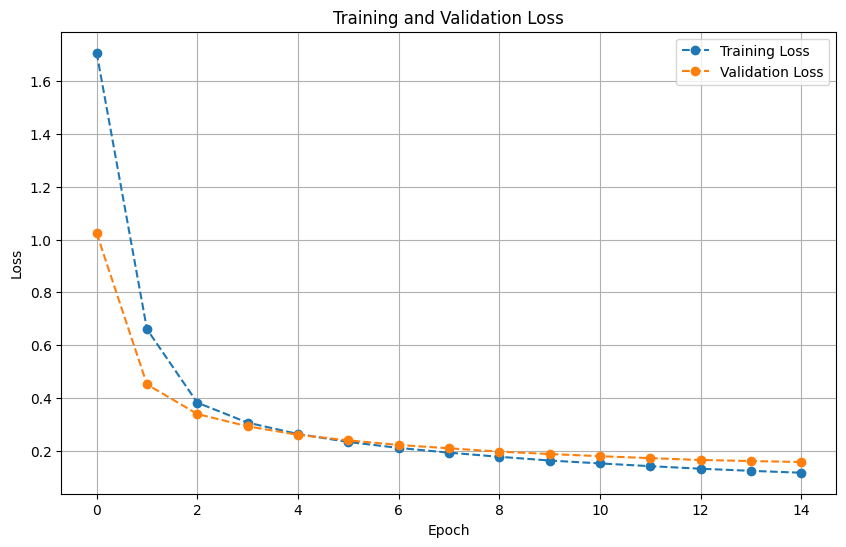

In [ ]:


# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - loss: 0.1666
Test Loss: 0.14428268373012543
Test Accuracy: 0.9573000073432922


In [ ]:
import matplotlib.pyplot as plt

# Loop through each layer in the model
for layer_index, layer in enumerate(model.layers):
    # Get the weights of the layer
    weights = layer.get_weights()

    # Check if the layer has weights
    if weights:
        # Print the shape of the weights
        print(f'Layer {layer_index} ({layer.name}) weights shape: {weights[0].shape}')


    else:
        print(f'Layer {layer_index} ({layer.name}) has no weights.')


Layer 0 (flatten) has no weights.
Layer 1 (dense) weights shape: (784, 128)
Layer 2 (dense_1) weights shape: (128, 64)
Layer 3 (dense_2) weights shape: (64, 10)


In [ ]:
#Only input and output layer# Define the Sequential model
model = keras.Sequential([
    # Flatten the 28x28 input images to a 1D array (784 elements)
    layers.Flatten(input_shape=(28, 28)),



    # Add another dense layer with 10 units (one for each digit) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate=0.0005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Train the model and collect training history

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, verbose=2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1500/1500 - 3s - 2ms/step - accuracy: 0.4869 - loss: 1.8024 - val_accuracy: 0.7282 - val_loss: 1.3753
Epoch 2/50
1500/1500 - 2s - 2ms/step - accuracy: 0.7570 - loss: 1.1958 - val_accuracy: 0.8060 - val_loss: 1.0072
Epoch 3/50
1500/1500 - 2s - 2ms/step - accuracy: 0.8023 - loss: 0.9466 - val_accuracy: 0.8338 - val_loss: 0.8313
Epoch 4/50
1500/1500 - 2s - 1ms/step - accuracy: 0.8231 - loss: 0.8149 - val_accuracy: 0.8473 - val_loss: 0.7292
Epoch 5/50
1500/1500 - 3s - 2ms/step - accuracy: 0.8359 - loss: 0.7331 - val_accuracy: 0.8571 - val_loss: 0.6623
Epoch 6/50
1500/1500 - 5s - 3ms/step - accuracy: 0.8439 - loss: 0.6769 - val_accuracy: 0.8618 - val_loss: 0.6150
Epoch 7/50
1500/1500 - 3s - 2ms/step - accuracy: 0.8501 - loss: 0.6356 - val_accuracy: 0.8648 - val_loss: 0.5796
Epoch 8/50
1500/1500 - 2s - 2ms/step - accuracy: 0.8555 - loss: 0.6037 - val_accuracy: 0.8679 - val_loss: 0.5521
Epoch 9/50
1500/1500 - 4s - 3ms/step - accuracy: 0.8593 - loss: 0.5783 - val_accuracy: 0.8712 - 

<ipython-input-7-85f13379b405>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


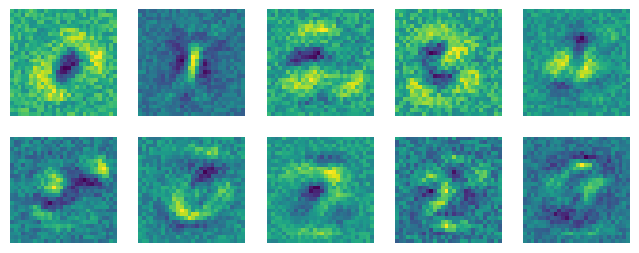

In [ ]:
import matplotlib.pyplot as plt

# Get the weights of a specific layer (e.g., the first dense layer)
layer_index = 1
weights = model.layers[layer_index].get_weights()[0]

# Reshape the weights to match the expected input shape (e.g., for a dense layer)
if len(weights.shape) == 2:
    weights = weights.reshape((28, 28, -1))

# Plot the weights as an image
plt.figure(figsize=(8, 8))
plt.title(f"Weights of Layer {layer_index}")
for i in range(weights.shape[-1]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(weights[:, :, i], cmap='viridis')
    plt.axis('off')

plt.show()
